In [2]:
import numpy as np
import sklearn
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from statsmodels.tsa.ar_model import AutoReg,ar_select_order
from statsmodels.tsa.arima.model import ARIMA
import random
import math

In [28]:
data=pd.read_csv('SolarPrediction.csv')

In [18]:
print(data['UNIXTime'].min())
print(data['UNIXTime'].max())

1472724008
1483264501


In [29]:
data['UNIX']=data['UNIXTime']

In [21]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,UNIX
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,1475229326
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,1475229023
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,1475228726
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,1475228421
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,1475228124


In [30]:
data['UNIXTime']=pd.to_datetime(data['UNIXTime'], unit='s')

In [31]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,UNIX
0,2016-09-30 09:55:26,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,1475229326
1,2016-09-30 09:50:23,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,1475229023
2,2016-09-30 09:45:26,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,1475228726
3,2016-09-30 09:40:21,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,1475228421
4,2016-09-30 09:35:24,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,1475228124


In [32]:
data['UNIXTime']=data.UNIXTime.dt.floor("min")

In [34]:
data=data.set_index('UNIXTime',inplace=False)

In [35]:
data.head()

,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,UNIX
UNIXTime,,,,,,,,,,,
2016-09-30 09:55:00,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,1475229326
2016-09-30 09:50:00,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,1475229023
2016-09-30 09:45:00,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,1475228726
2016-09-30 09:40:00,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,1475228421
2016-09-30 09:35:00,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,1475228124


In [52]:
data.index=data.index.to_period("5min")

In [59]:
data.head()

,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,UNIX
UNIXTime,,,,,,,,,,,
2016-09-30 09:55,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,1475229326
2016-09-30 09:50,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,1475229023
2016-09-30 09:45,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,1475228726
2016-09-30 09:40,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,1475228421
2016-09-30 09:35,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,1475228124


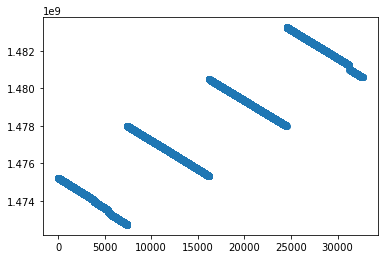

In [64]:
plt.scatter(np.arange(0,len(data)),data['UNIX'])

In [65]:
data=data.sort_values(by=['UNIX'])

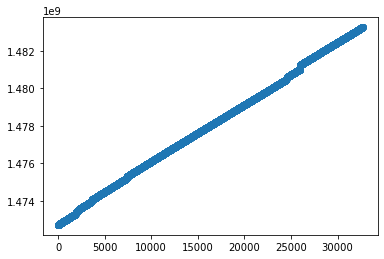

In [66]:
plt.scatter(np.arange(0,len(data)),data['UNIX'])

In [41]:
def lets_drop_some_data_multy(X,num_skip):
    ind_skip=random.randint(0,len(X))
    i=ind_skip
    size=ind_skip+num_skip
    while i <(ind_skip+num_skip):
        if X['Radiation'][i]!=np.nan:
            X['Radiation'][i]=np.nan
            i+=1
            
    return X,ind_skip,size

In [42]:
def lets_make_num_prop(i,k):
    len_prop=i
    num_of_props=k
    data_droped=data.copy(deep=True)
    
    number_props=0
    
    ind_skipped=([])
    
    while number_props< num_of_props:
        data_droped,st,ed=lets_drop_some_data_multy(data_droped,len_prop)
        ind_skipped.append((st,ed))
        number_props+=1
   
    return ind_skipped,data_droped

In [67]:
x,data_prop=lets_make_num_prop(10,100)

<ipython-input-41-a44e8c1941bf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Radiation'][i]=np.nan


In [68]:
print(x)

[(20371, 20381), (5150, 5160), (8822, 8832), (12352, 12362), (20672, 20682), (22690, 22700), (32071, 32081), (29465, 29475), (8955, 8965), (31714, 31724), (24967, 24977), (23994, 24004), (17746, 17756), (31976, 31986), (158, 168), (10185, 10195), (9229, 9239), (27765, 27775), (3291, 3301), (5123, 5133), (25194, 25204), (22501, 22511), (7382, 7392), (3047, 3057), (25830, 25840), (20210, 20220), (30452, 30462), (21863, 21873), (16028, 16038), (15899, 15909), (10648, 10658), (29668, 29678), (24931, 24941), (925, 935), (383, 393), (19358, 19368), (5421, 5431), (18344, 18354), (2697, 2707), (31251, 31261), (32040, 32050), (11359, 11369), (16451, 16461), (12940, 12950), (29820, 29830), (29042, 29052), (19626, 19636), (5020, 5030), (2563, 2573), (20372, 20382), (5616, 5626), (988, 998), (28415, 28425), (13342, 13352), (16213, 16223), (2783, 2793), (22980, 22990), (10921, 10931), (10211, 10221), (14591, 14601), (22432, 22442), (22230, 22240), (26774, 26784), (15934, 15944), (831, 841), (6590, 

In [ ]:
data_int_forest=data_prop.copy(deep=True)
data_int_arima=data_prop.copy(deep=True)
data_int_autoreg=data_prop.copy(deep=True)

In [ ]:
data_study=data_prop.copy(deep=True)
data_study=data_study.dropna

In [84]:
exog_params_multy = data_study[['Temperature', 'Pressure','Humidity']]
    
model = ARIMA(endog=data_study['Radiation'],exog=exog_params_multy,order=(2, 1, 1))
model_fit = model.fit()

[5 6 7 8 9]


In [ ]:
model_autoreg = AutoReg(data_study['Radiation'], lags=33,exog=exog_params_multy, seasonal=False)
model_autoreg_fit = model_autoreg.fit()

In [ ]:
for i in range(len(x)):
    exog_params=data[['Temperature', 'Pressure','Humidity']][x[i][0]: x[i][1]]
    int_arima=model_fit.predict(start=x[i][0], end=[i][1],exog=exog_params)
    int_autoreg=model_fit.predict(start=x[i][0], end=[i][1],exog=exog_params)
    data_int_arima['Radiation'][x[i][0]: x[i][1]]=int_arima
    data_int_autoreg['Radiation'][x[i][0]: x[i][1]]=int_autoreg
    

In [ ]:
mse_ARIMA=mean_squared_error(data['Radiation'],data_int_arima['Radiation'])

In [ ]:
mse_autoreg=mean_squared_error(data['Radiation'],data_int_autoreg['Radiation'])

In [69]:
data_study=data_prop.copy(deep=True)
data_study=data_study.dropna)(

In [70]:
exog_params_multy = data_study[['Temperature', 'Pressure','Humidity']]
    
model = ARIMA(endog=data_study['Radiation'],exog=exog_params_multy,order=(2, 1, 1))
model_fit = model.fit()

In [71]:
exog_params=data[['Temperature', 'Pressure','Humidity']][20371: 20381]

In [72]:
print(exog_params)

                  Temperature  Pressure  Humidity
UNIXTime                                         
2016-11-15 18:50           52     30.48        70
2016-11-15 18:55           52     30.47        72
2016-11-15 19:00           52     30.48        74
2016-11-15 19:05           53     30.48        75
2016-11-15 19:10           53     30.48        79
2016-11-15 19:15           53     30.49        81
2016-11-15 19:20           53     30.49        82
2016-11-15 19:25           54     30.49        85
2016-11-15 19:30           53     30.49        88
2016-11-15 19:35           53     30.49        91


In [73]:
int_arima=model_fit.predict(start=20371, end=20381,exog=exog_params)

In [74]:
print(int_arima)

UNIXTime
2016-11-17 19:55    637.169943
2016-11-17 20:00    670.188307
2016-11-17 20:05    698.379927
2016-11-17 20:10    745.350202
2016-11-17 20:15    759.105793
2016-11-17 20:20    694.675331
2016-11-17 20:25    806.731159
2016-11-17 20:30    834.115411
2016-11-17 20:35    603.969552
2016-11-17 20:40    651.793913
2016-11-17 20:45    771.797476
Freq: 5T, Name: predicted_mean, dtype: float64


In [75]:
model_autoreg = AutoReg(data_study['Radiation'], lags=33,exog=exog_params_multy, seasonal=False)
model_autoreg_fit = model_autoreg.fit()

C:\Users\Vi\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [76]:
int_auto=model_fit.predict(start=20371, end=20381,exog=exog_params)

In [77]:
print(int_auto)

UNIXTime
2016-11-17 19:55    637.169943
2016-11-17 20:00    670.188307
2016-11-17 20:05    698.379927
2016-11-17 20:10    745.350202
2016-11-17 20:15    759.105793
2016-11-17 20:20    694.675331
2016-11-17 20:25    806.731159
2016-11-17 20:30    834.115411
2016-11-17 20:35    603.969552
2016-11-17 20:40    651.793913
2016-11-17 20:45    771.797476
Freq: 5T, Name: predicted_mean, dtype: float64
